In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.colors as mcolors

plt.style.use('seaborn-whitegrid')

<ipython-input-35-db7617504bea>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
A = [
    [-10.2, 9.3],
    [5.3, 15.8],
    [-17.2, 10.3],
]

B = [
    73, 173, 159
]

A = np.array(A)
B = np.array(B)




In [ ]:
intersections = np.array([np.linalg.solve(A[list(i)], B[list(i)]) for i in combinations(range(len(B)), 2)])

pad = 5
plot_x1_min_max = intersections[:, 0].min() - pad, intersections[:, 0].max() + pad
plot_x2_min_max = intersections[:, 1].min() - pad, intersections[:, 1].max() + pad
intersections

array([[  2.1644096 ,  10.22333096],
       [-13.23861566,  -6.67030965],
       [ -2.23778152,  11.70001532]])

In [ ]:
def get_x2(a1, a2, b, x1):
    return (a1 * x1 - b) / a2

lines = [
    [(plot_x1_min_max[0], plot_x1_min_max[1]), (get_x2(*a, b, plot_x1_min_max[0]), get_x2(*a, b, plot_x1_min_max[1]))]
    for a, b in zip(A, B)
]

[[(-18.23861566484517, 7.16440959847945),
  (12.154180621658142, -15.707201925214019)],
 [(-18.23861566484517, 7.16440959847945),
  (-17.06738373567591, -8.546115767598666)],
 [(-18.23861566484517, 7.16440959847945),
  (15.019824217022999, -27.40076165959675)]]

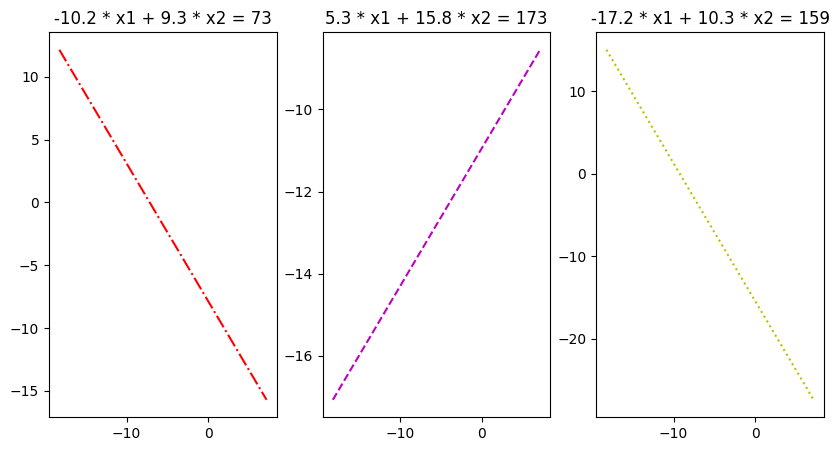

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
styles = ['-.r', '--m', ':y']
for l, a, s, a1a2, b in zip(lines, ax, styles, A, B):
    a.plot(*l, s)
    a.set_title('{} * x1 + {} * x2 = {}'.format(*a1a2, b))




In [ ]:
def generate():
    for i, (l, s, a1a2, b) in enumerate(zip(lines, styles, A, B)):
        plt.plot(*l, s, label='{} * x1 + {} * x2 = {}'.format(*a1a2, b))
        plt.annotate(f'f[{i}]', (l[0][1], l[1][1]))
    plt.plot(intersections[:, 0], -intersections[:, 1], '.g')

    X = np.linspace(intersections[:, 0].min(), intersections[:, 0].max())

    plt.fill_between(X, get_x2(*A[0], B[0], X), np.max([get_x2(*A[1], B[1], X), get_x2(*A[2], B[2], X)], axis=0), color='green',
                    alpha=0.5)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('all lines')
    plt.legend(loc='best')




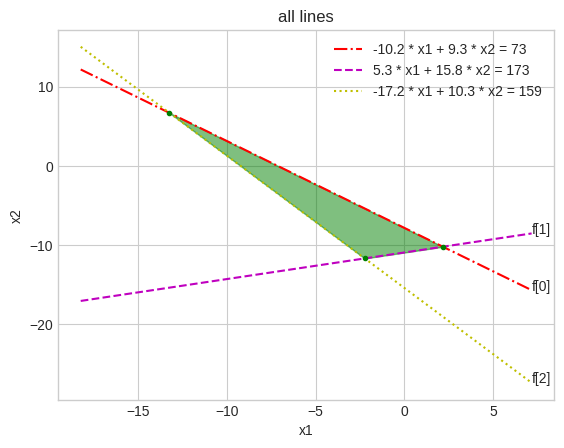

In [ ]:
generate()

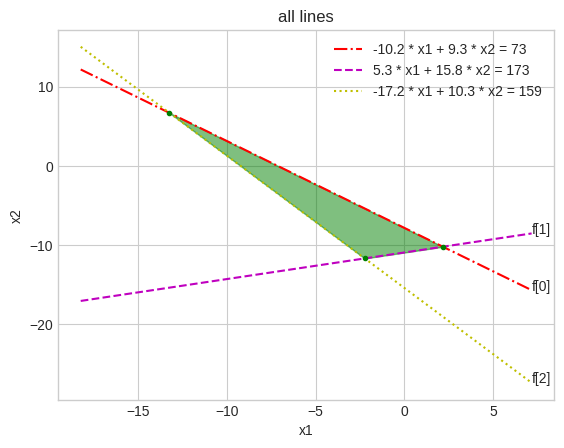

In [ ]:
generate()
plt.savefig('result.png')


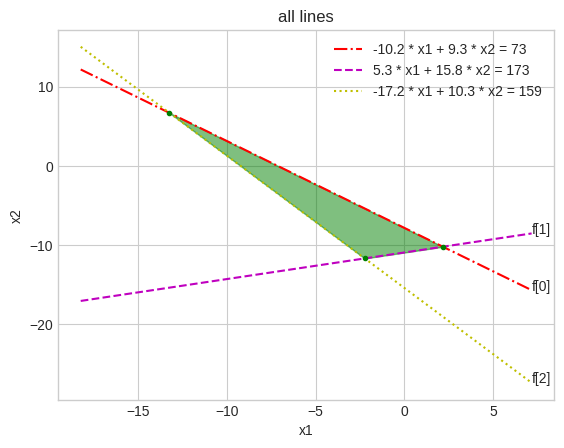

In [ ]:
generate()
plt.savefig('result.svg')

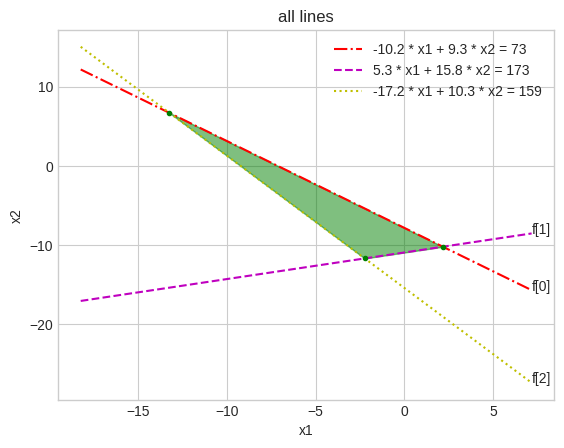

In [ ]:
generate()
plt.savefig('result.jpg')